# Modeling - exercises

In [117]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import acquire
import viz
import env
np.random.seed(4)





In [118]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [119]:
df.rename(columns={'sepal length (cm)':'sepal_length',
                   'sepal width (cm)': 'sepal_width',
                   'petal length (cm)':'petal_length',
                   'petal width (cm)':'petal_width'},inplace=True)

In [120]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1. Clustering with the Iris Dataset

* Using this lesson as a guide, perform clustering on the iris dataset.

    * a. Choose features other than the ones used in the lesson.
    * b. Visualize the results of your clustering.
    * c. Use the elbow method to visually select a good value for k.
    * d. Repeat the clustering, this time with 3 different features.

In [121]:
# a. Choose features other than the ones used in the lesson.
X = df[['petal_width', 'sepal_width']]


In [122]:
# KMeans predictions
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [123]:
# cluster
df['cluster'] = kmeans.predict(X)


In [124]:
# look at centers
kmeans.cluster_centers_


array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [125]:
# Centeroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [126]:
df.groupby('cluster')[['petal_width', 'sepal_width']].mean()


,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


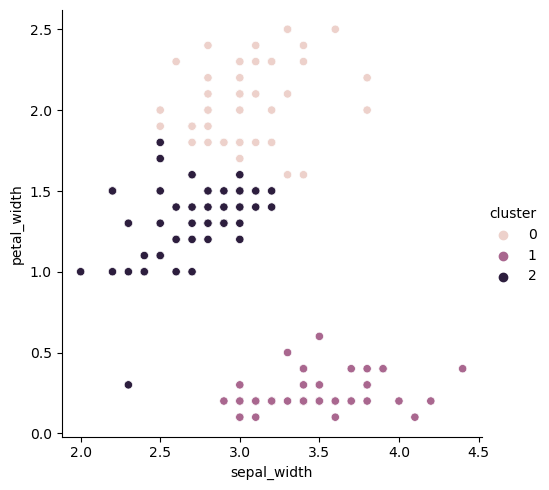

In [130]:
sns.relplot(x='sepal_width', y='petal_width',hue='cluster',data=df)

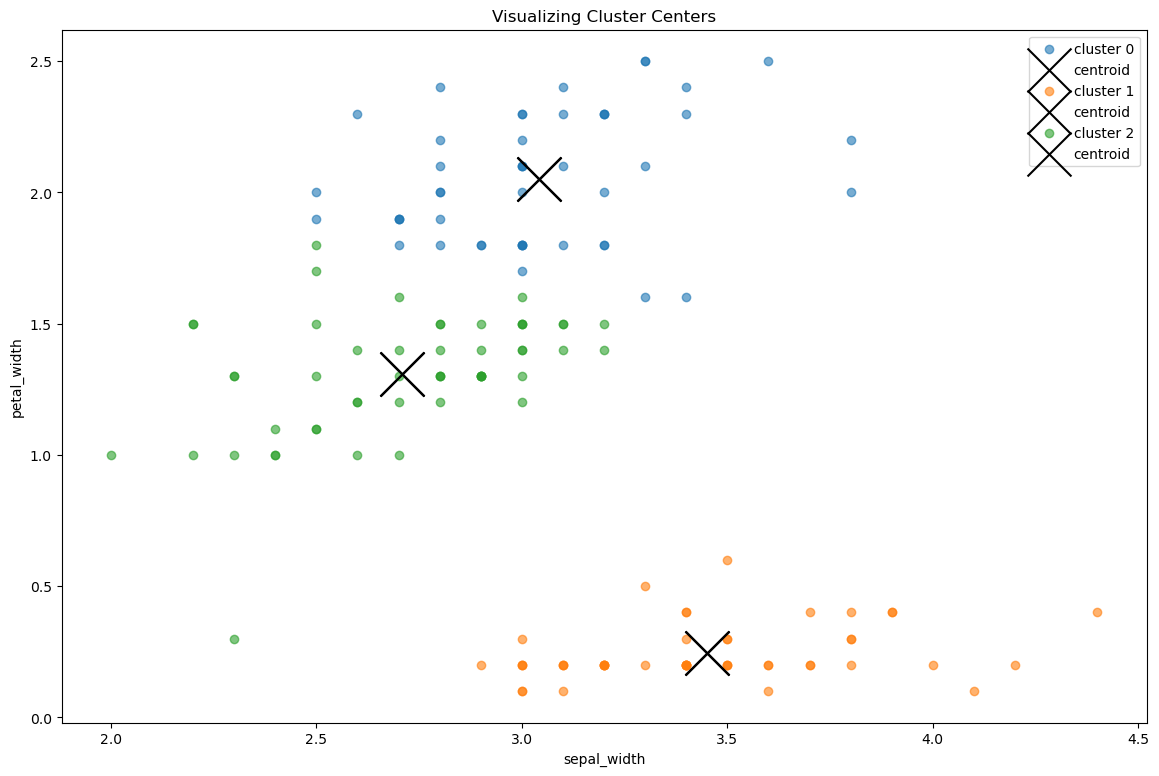

In [131]:
# b.  Visualize the results of your clustering.
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

    centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel('sepal_width')
    plt.ylabel('petal_width')
    plt.title('Visualizing Cluster Centers')


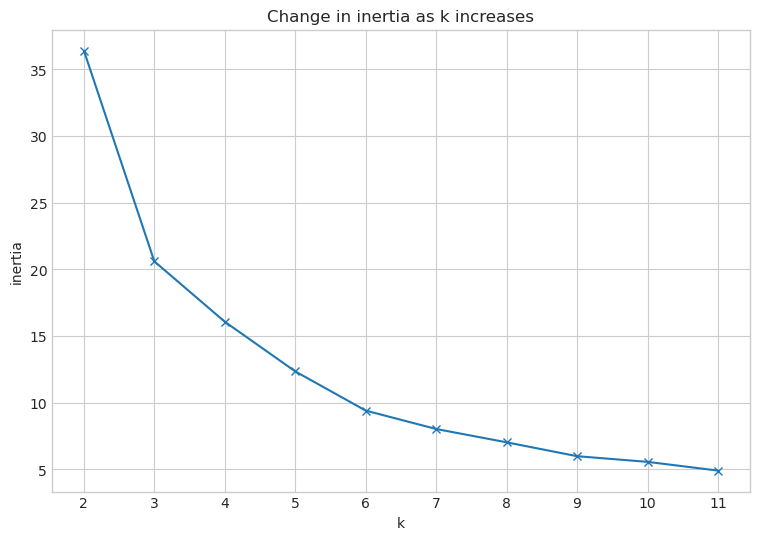

In [132]:
# c. Use the elbow method to visually select a good value for k. = 6 clusters

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

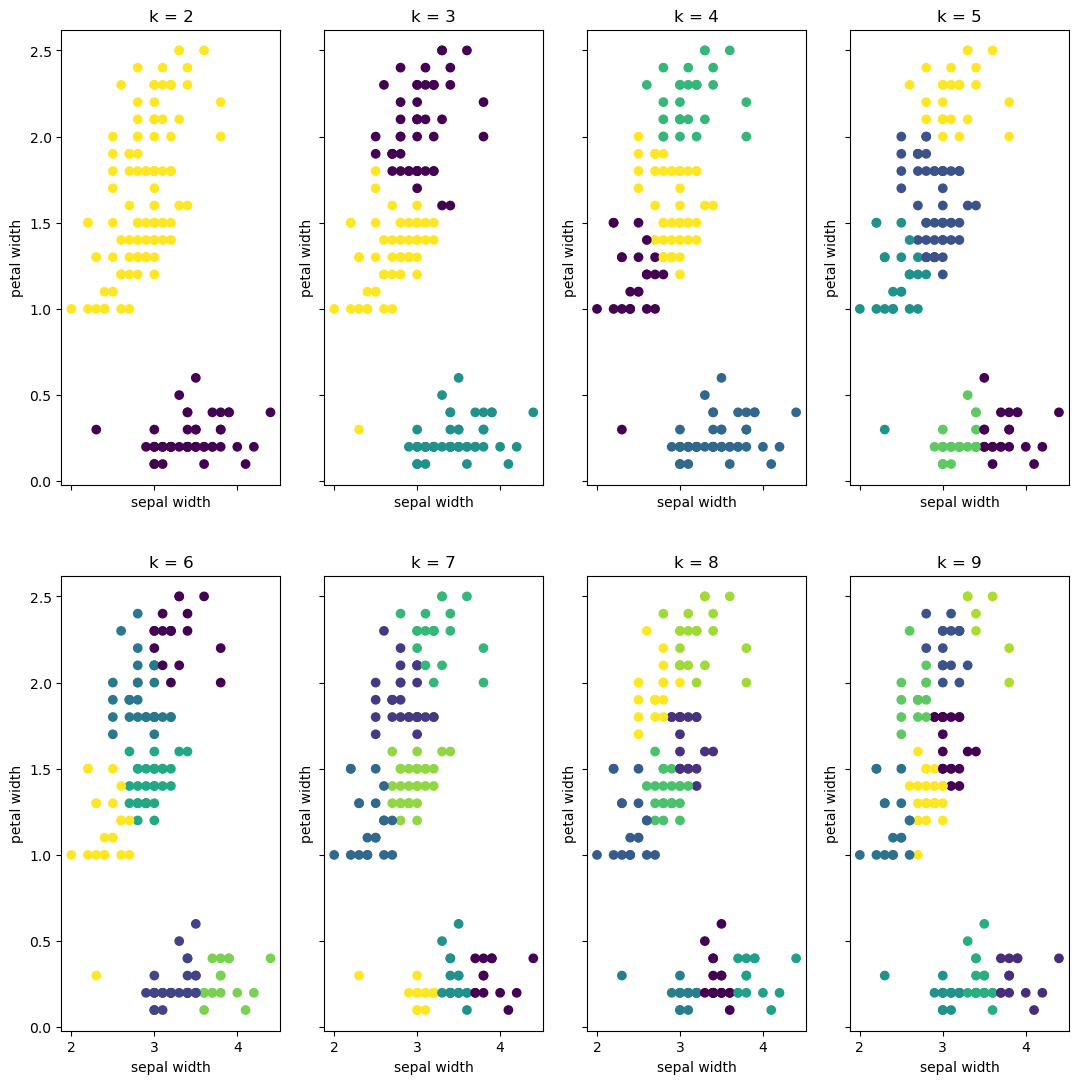

In [133]:
fig, axs = plt.subplots(2, 4, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')


In [52]:
# Repeat the clustering, this time with 3 different features

In [54]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [55]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.rename(columns={'sepal length (cm)':'sepal_length',
                   'sepal width (cm)': 'sepal_width',
                   'petal length (cm)':'petal_length',
                   'petal width (cm)':'petal_width'},inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
X = df[['petal_width', 'sepal_width','petal_length']]

In [57]:
# KMeans predictions
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [59]:
# cluster
df['cluster'] = kmeans.predict(X)


In [60]:
# look at centers
kmeans.cluster_centers_

array([[0.246     , 3.428     , 1.462     ],
       [2.03265306, 3.00204082, 5.57959184],
       [1.33333333, 2.74705882, 4.25882353]])

In [61]:
# Centeroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width,petal_length
0,0.246000,3.428000,1.462000
1,2.032653,3.002041,5.579592
2,1.333333,2.747059,4.258824


In [62]:
df.groupby('cluster')[['petal_width', 'sepal_width','petal_length']].mean()

,petal_width,sepal_width,petal_length
cluster,,,
0,0.246000,3.428000,1.462000
1,2.032653,3.002041,5.579592
2,1.333333,2.747059,4.258824


# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [66]:
#get my data
df = pd.read_sql('SELECT * FROM customers;', env.get_db_url('mall_customers'))
df = df.set_index('customer_id')

#see it
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
 4   is_male         200 non-null    uint8 
 5   cluster         200 non-null    int32 
dtypes: int32(1), int64(3), object(1), uint8(1)
memory usage: 8.8+ KB


In [70]:
df.describe(include='all')

,gender,age,annual_income,spending_score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [71]:
def train_validate_test_split(df, target, seed=123):
    '''
    accepts dataframe and splits the data into train, validate and test 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=seed)
    return train, validate, test

In [72]:
def scale_my_data(train, validate, test):
    '''
    scale my data using minmaxscaler and add it back to my input datasets
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[['age', 'annual_income']])
    
    X_train_scaled = scaler.transform(train[['age', 'annual_income']])
    X_validate_scaled = scaler.transform(validate[['age', 'annual_income']])
    X_test_scaled = scaler.transform(test[['age', 'annual_income']])

    train[['age_scaled', 'annual_income_scaled']] = X_train_scaled
    validate[['age_scaled', 'annual_income_scaled']] = X_validate_scaled
    test[['age_scaled', 'annual_income_scaled']] = X_test_scaled
    return train, validate, test

In [73]:
def prep_mall(df):
    '''
    dummy var for gender into is_male
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    train, validate, test = train_validate_test_split(df, target='spending_score', seed=1349)
    train, validate, test = scale_my_data(train, validate, test)
    
    print(f'df: {df.shape}')
    print()
    print(f'train: {train.shape}')
    print(f'validate: {validate.shape}')
    print(f'test: {test.shape}')
    return df, train, validate, test

In [76]:
#prep my data!
df, train, validate, test = prep_mall(df)

df: (200, 5)

train: (120, 7)
validate: (40, 7)
test: (40, 7)


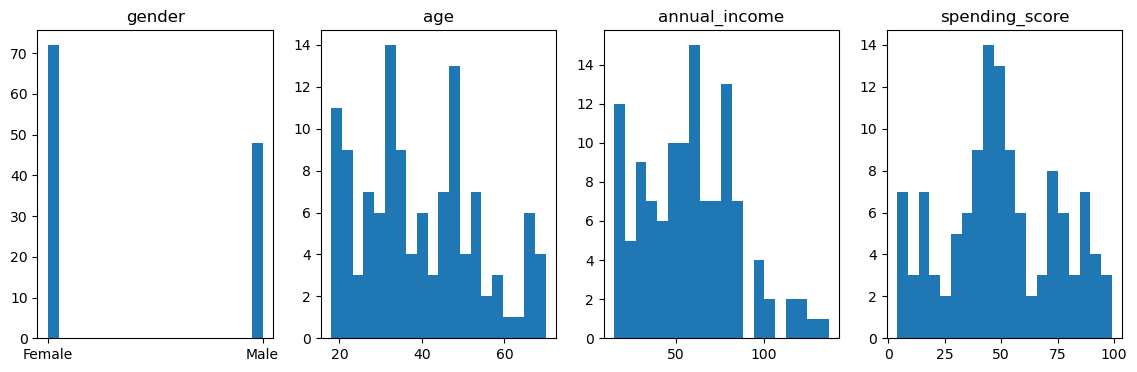

In [77]:
#distribution of all my variables
plt.figure(figsize=(14,4))

for i, col in enumerate(train.columns[:-3]):
    plt.subplot(1,len(train.columns[:-3]),i+1)
    plt.hist(train[col], bins=20)
    plt.title(col)

In [78]:
# a. Choose features other than the ones used in the lesson.
X = df[['age', 'annual_income']]

In [113]:
# KMeans predictions
kmeans = KMeans(random_state=4,n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 1, 2, 0, 1, 2, 1, 1, 1], dtype=int32)

In [115]:
# cluster
train['cluster'] = kmeans.predict(X)

,gender,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,,
1,Male,19,15,39,1,2
2,Male,21,15,81,1,2
3,Female,20,16,6,0,2
4,Female,23,16,77,0,2
5,Female,31,17,40,0,2
...,...,...,...,...,...,...
196,Female,35,120,79,0,0
197,Female,45,126,28,0,0
198,Male,32,126,74,1,0


In [82]:
# look at centers
kmeans.cluster_centers_

array([[34.34782609, 82.82608696],
       [55.03448276, 50.34482759],
       [28.36      , 31.44      ]])

In [90]:
# Centeroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,34.347826,82.826087
1,55.034483,50.344828
2,28.360000,31.440000


In [83]:
df.groupby('cluster')[['age', 'annual_income']].mean()

,age,annual_income
cluster,,
0,34.347826,82.826087
1,55.034483,50.344828
2,28.360000,31.440000


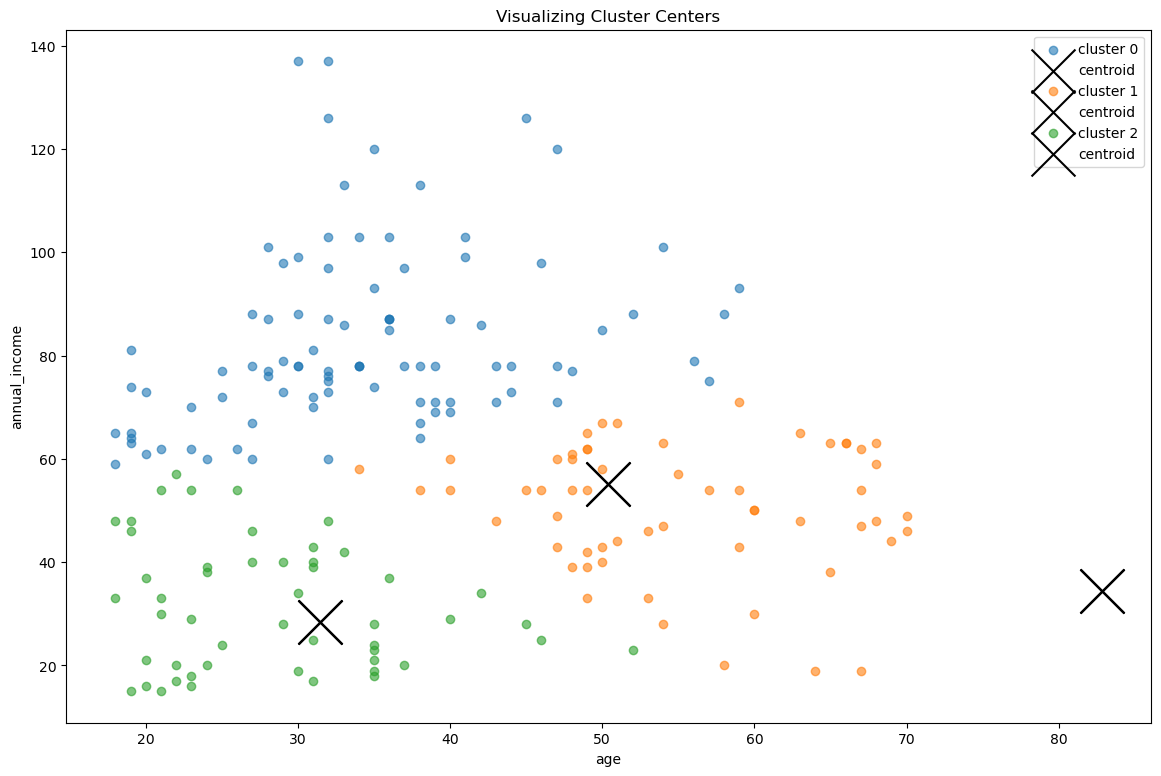

In [91]:
# b.  Visualize the results of your clustering.
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

    centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel('age')
    plt.ylabel('annual_income')
    plt.title('Visualizing Cluster Centers')

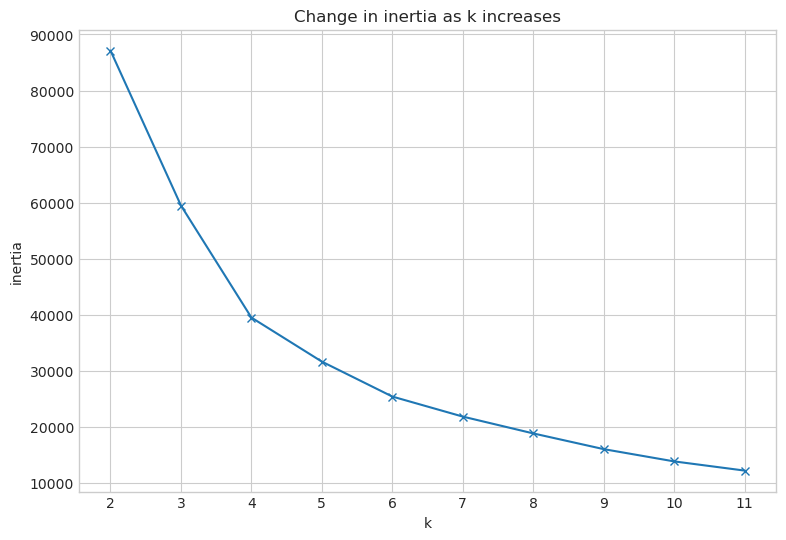

In [92]:
# c. Use the elbow method to visually select a good value for k. = 6 clusters

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

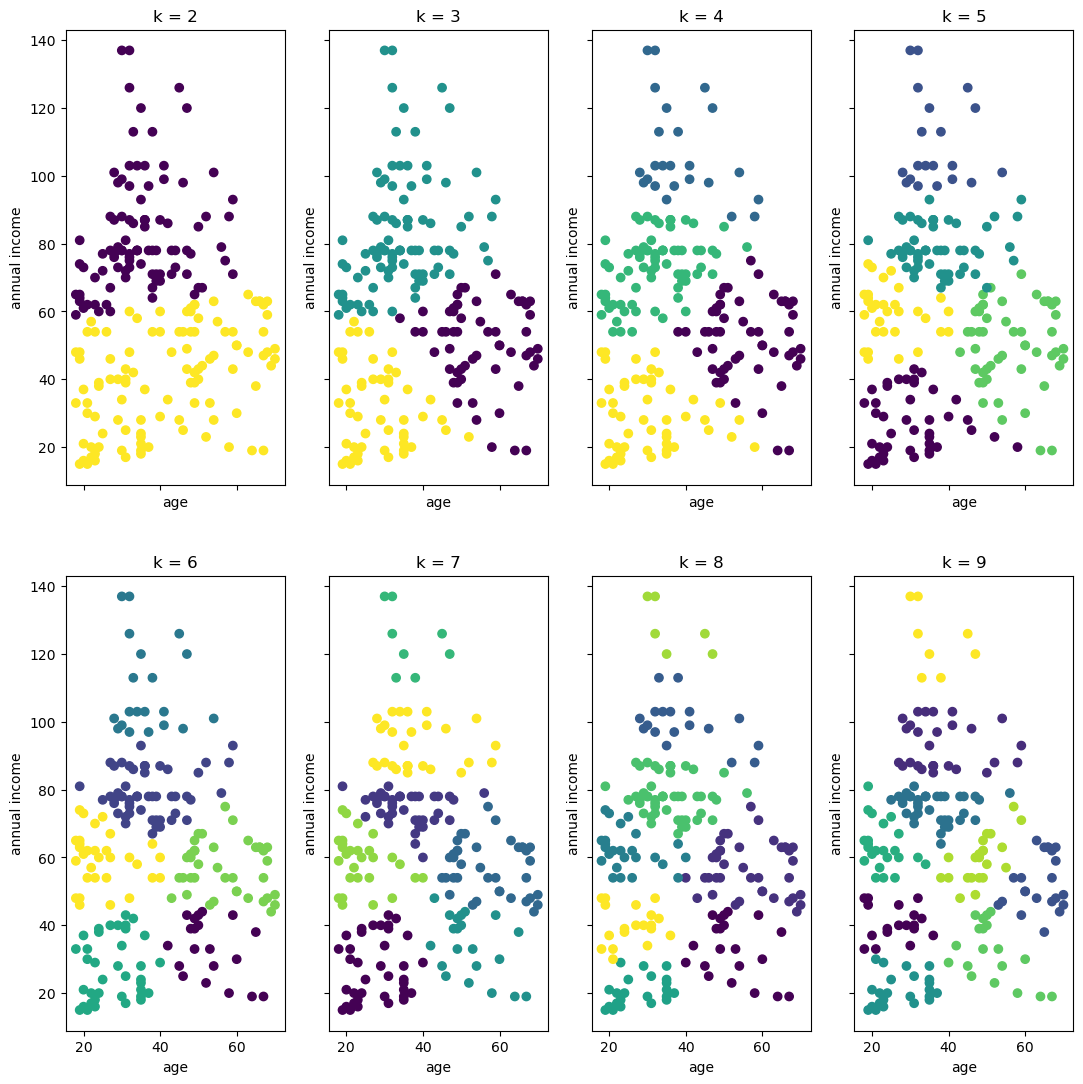

In [93]:
fig, axs = plt.subplots(2, 4, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual income')

# 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [ ]:
#get my data
df = pd.read_sql('SELECT * FROM customers;', env.get_db_url('mall_customers'))
df = df.set_index('customer_id')

#see it
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
#prep my data!
df, train, validate, test = prep_mall(df)

df: (200, 5)

train: (120, 7)
validate: (40, 7)
test: (40, 7)


In [ ]:
# Scale data
scale_my_data(train, validate, test)

(             gender  age  annual_income  spending_score  is_male  age_scaled  \
 customer_id                                                                    
 158          Female   30             78              78        0    0.230769   
 14           Female   24             20              77        0    0.115385   
 116          Female   19             65              50        0    0.019231   
 69             Male   19             48              59        1    0.019231   
 167            Male   42             86              20        1    0.461538   
 ...             ...  ...            ...             ...      ...         ...   
 177            Male   58             88              15        1    0.769231   
 195          Female   47            120              16        0    0.557692   
 13           Female   58             20              15        0    0.769231   
 35           Female   49             33              14        0    0.596154   
 118          Female   49   

In [ ]:
train.head()


,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled
customer_id,,,,,,,
158,Female,30,78,78,0,0.230769,0.516393
14,Female,24,20,77,0,0.115385,0.040984
116,Female,19,65,50,0,0.019231,0.409836
69,Male,19,48,59,1,0.019231,0.270492
167,Male,42,86,20,1,0.461538,0.581967


In [ ]:
# a. Choose features other than the ones used in the lesson.
X = train[['age_scaled', 'annual_income_scaled']]

In [ ]:
# KMeans predictions
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0,
       2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 2, 1, 0, 2, 1, 2, 2, 2], dtype=int32)

In [ ]:
# cluster
train['cluster'] = kmeans.predict(X)

In [ ]:
# look at centers
kmeans.cluster_centers_

array([[0.18433396, 0.17892843],
       [0.3032967 , 0.6028103 ],
       [0.70804196, 0.31743666]])

In [ ]:
# Centeroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age_scaled,annual_income_scaled
0,0.184334,0.178928
1,0.303297,0.602810
2,0.708042,0.317437


In [107]:
train.groupby('cluster')[['age_scaled', 'annual_income_scaled']].mean()

,age_scaled,annual_income_scaled
cluster,,
0,0.184334,0.178928
1,0.303297,0.602810
2,0.708042,0.317437


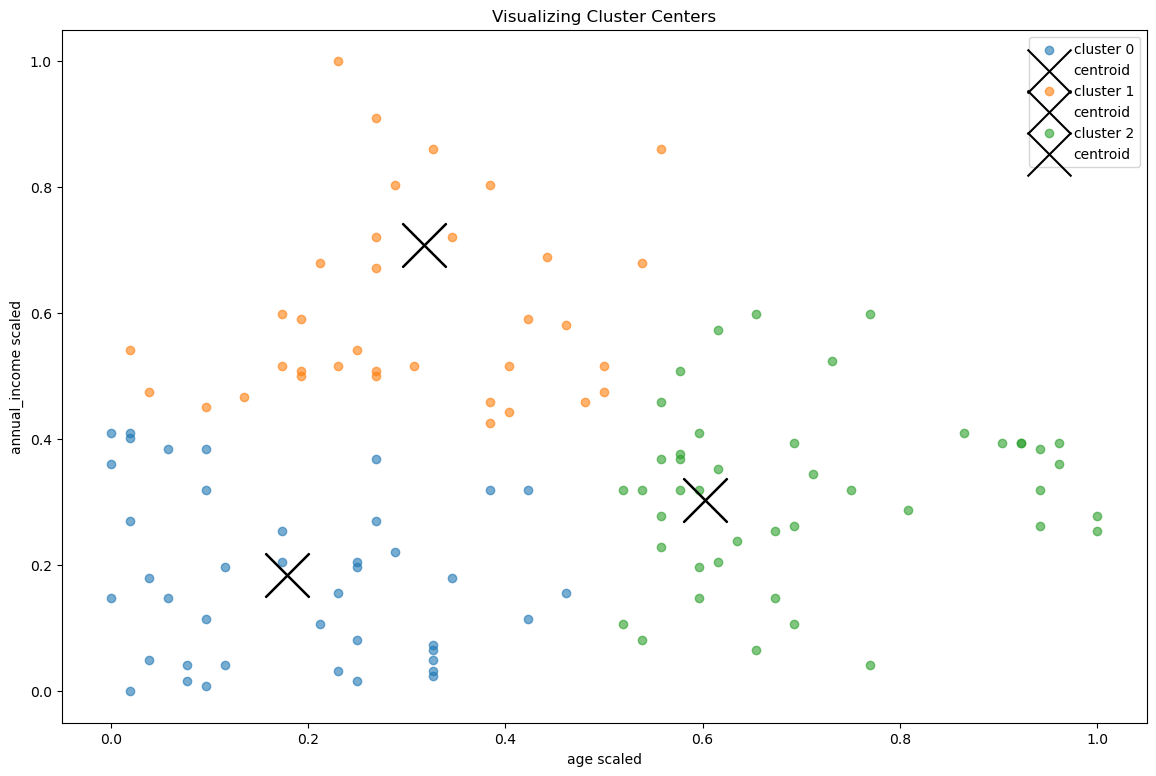

In [109]:
# b.  Visualize the results of your clustering.
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.age_scaled, subset.annual_income_scaled, label='cluster ' + str(cluster), alpha=.6)

    centroids.plot.scatter(y='age_scaled', x='annual_income_scaled', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel('age scaled')
    plt.ylabel('annual_income scaled')
    plt.title('Visualizing Cluster Centers')

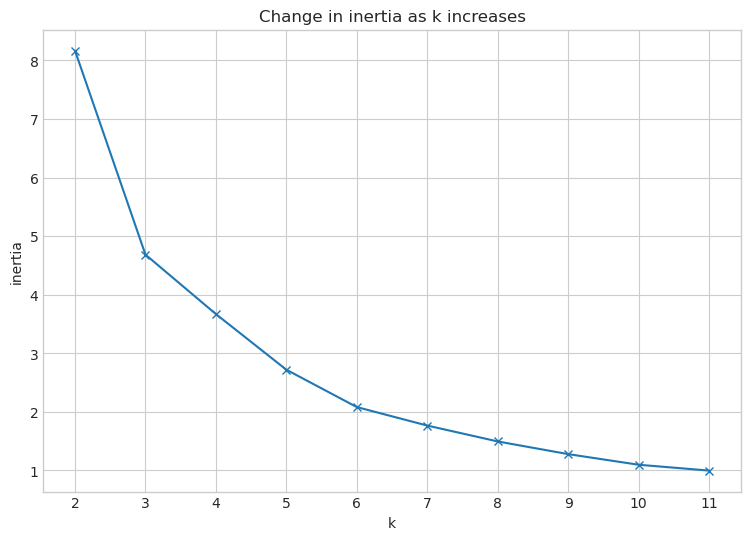

In [110]:
# c. Use the elbow method to visually select a good value for k. = 6 clusters

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

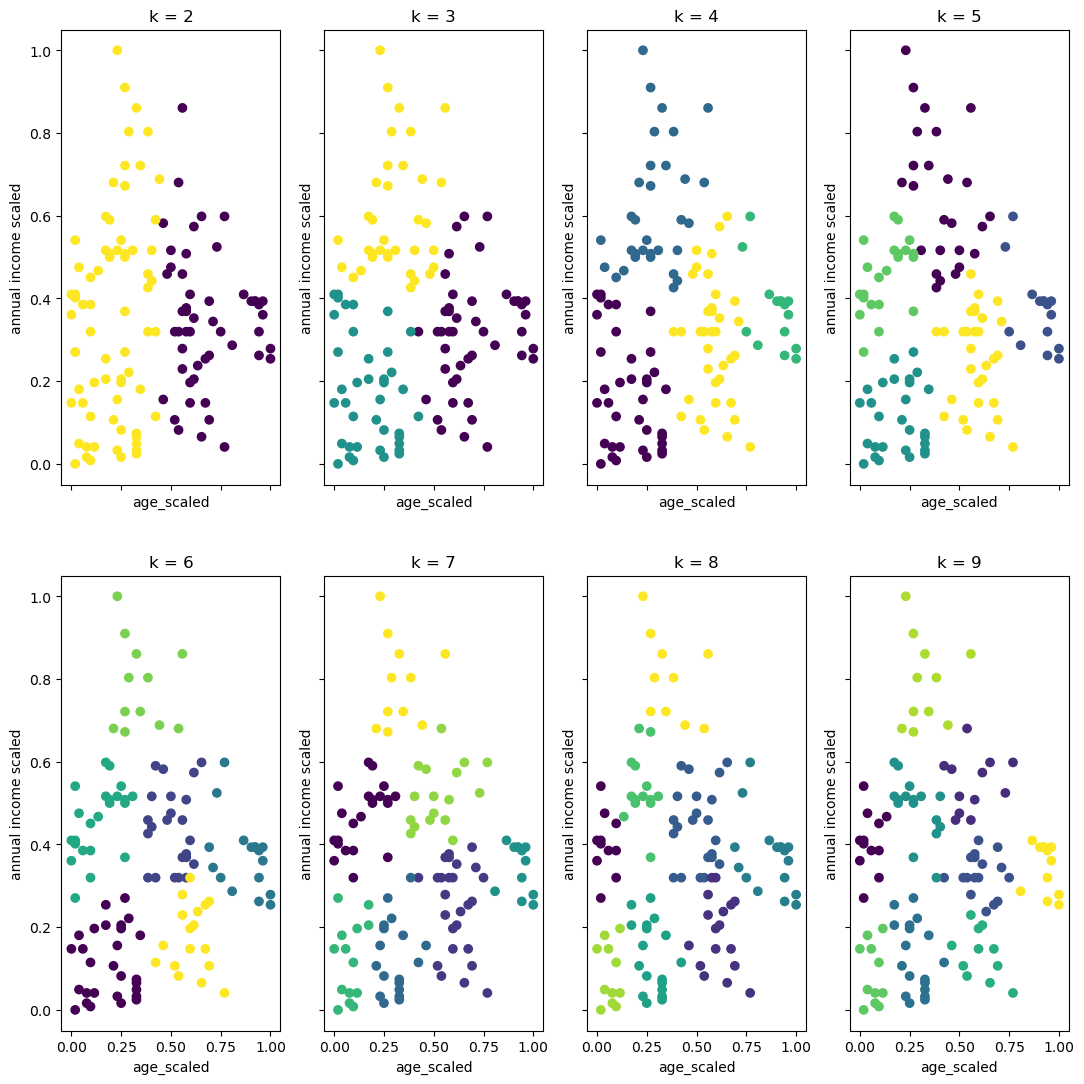

In [112]:
fig, axs = plt.subplots(2, 4, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age_scaled, X.annual_income_scaled, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age_scaled', ylabel='annual income scaled')

In [134]:
import pandas as pd

# Read the red wine dataset
red_wine = pd.read_csv("https://query.data.world/s/5qskj32os6cnsnoufbyjkaqy7v6ntk")
red_wine['wine_type'] = 'red'

# Read the white wine dataset
white_wine = pd.read_csv("https://query.data.world/s/ebf3s3i2qmp2i7iht4x6j4vdpwjshe")
white_wine['wine_type'] = 'white'

# Concatenate the datasets vertically
combined_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Save the combined dataset as a new CSV file
combined_wine.to_csv("combined_wine.csv", index=False)


HTTPError: HTTP Error 404: Not Found

In [142]:
import pandas as pd

# Read the red wine dataset
red_wine = pd.read_csv("winequality-red.csv", delimiter=",")  # Update the filename if necessary
red_wine['wine_type'] = 'red'

# Read the white wine dataset
white_wine = pd.read_csv("winequality-white.csv", delimiter=",")  # Update the filename if necessary
white_wine['wine_type'] = 'white'

# Concatenate the datasets vertically
combined_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Save the combined dataset as a new CSV file
combined_wine.to_csv("combined_wine.csv", index=False)


In [143]:
df = pd.read_csv('combined_wine.csv')

In [144]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
2029,6.8,0.29,0.5,13.3,0.053,48.0,194.0,0.9974,3.09,0.45,9.4,5,white


In [145]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
